In [1]:
from openfermion.ops import BosonOperator, QuadOperator, normal_ordered_quad

In [2]:
import numpy as np

In [3]:
import strawberryfields as sf
from strawberryfields.ops import *
from SFopenfermion.ops import *
from SFopenfermion.hamiltonians import *

In [4]:
H1, t1 = two_mode_squeezing(0.1)
H1

1j [0 1] +
(-0-1j) [0^ 1^]

In [5]:
H2, t2 = beamsplitter(mode1=0, mode2=2)
H2

1j [0^ 2] +
(-0-1j) [0 2^]

In [6]:
eng, q = sf.Engine(3, hbar=2)

with eng:
    GaussianHamiltonian(t1, H1) | (q[1], q[2])
    GaussianHamiltonian(t2, H2, 'global') | q
    
state = eng.run('gaussian')

In [7]:
np.round(state.cov(), 10)

array([[ 1.01003338, -0.14236605,  0.01003338,  0.        ,  0.        ,
         0.        ],
       [-0.14236605,  1.02006676, -0.14236605,  0.        ,  0.        ,
         0.        ],
       [ 0.01003338, -0.14236605,  1.01003338,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.01003338,  0.14236605,
         0.01003338],
       [ 0.        ,  0.        ,  0.        ,  0.14236605,  1.02006676,
         0.14236605],
       [ 0.        ,  0.        ,  0.        ,  0.01003338,  0.14236605,
         1.01003338]])

In [8]:
eng.print_applied()

BSgate(0.7854, 0), 	(reg[1], reg[2])
Sgate(-0.1, 0), 	(reg[1])
Sgate(-0.1, 0), 	(reg[2])
Rgate(1.571), 	(reg[1])
BSgate(0.7854, 0), 	(reg[1], reg[2])
BSgate(1.571, 0), 	(reg[0], reg[1])
BSgate(-0.7854, 0), 	(reg[1], reg[2])
BSgate(-1.571, 0), 	(reg[0], reg[1])


# Displacement

In [1]:
from openfermion.ops import BosonOperator, QuadOperator, normal_ordered_quad

In [2]:
import numpy as np

In [3]:
import strawberryfields as sf
from strawberryfields.ops import *
from SFopenfermion.ops import *
from SFopenfermion.hamiltonians import *

In [6]:
quadratic_coefficients(xdisplacement(0.1, hbar=0.5)[0])

(array([[ 0.,  0.],
        [ 0.,  0.]]), array([ 2.,  0.]))

In [7]:
H = lambda t: get_quad_operator(BosonOperator('0^ 0', t), hbar=2) + QuadOperator('q0', 0.1)

In [ ]:
H1 = BosonOperator('0^ 0')

In [5]:
H2 = QuadOperator('q0 p0') + QuadOperator('p0 q0') - QuadOperator('p2 p2')

In [84]:
H2

1.0 [q0 p0] +
1.0 [p0 q0] +
-1.0 [p2 p2]

In [85]:
eng, q = sf.Engine(3, hbar=2)


with eng:
    GaussianHamiltonian(1, H1) | q[0]
    GaussianHamiltonian(0.5, H2, 'global') | q

state = eng.run('gaussian')

In [8]:
res = []
for t in np.arange(0.001, 1, 0.001):
    eng, q = sf.Engine(3, hbar=2)

    with eng:
        GaussianHamiltonian(1, H(t)) | q[0]

    state = eng.run('gaussian')
    res.append(state.means()[3])
    
res = np.array(res)

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

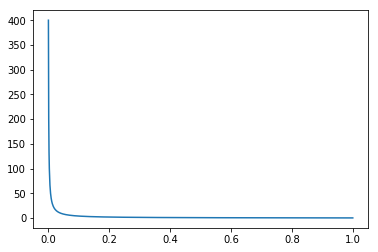

In [12]:
plt.plot(np.arange(0.001,1,0.001),res)

In [51]:
np.round(state.cov(), 5)

array([[ 1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.]])

In [31]:
eng.print_applied()

Zgate(-0.2), 	(reg[0])
